# Emotion Detection

**Importing Libraries**

In [6]:
import matplotlib.pyplot as plt
from glob import glob  #glob is used to create a list of all files present in a directory
import cv2  # cv2 is used to read the images
import random
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator  # this generator convets the data in such a form which is understandable by machine
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D  # dense is a linear function, Input decides the input size, Dropout makes 
# that it not only works on training data but also on images etc, Flatten changes the matrix into a 1D array, Conv2D makes convolution layers which reads images
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D  # Batchnormalisation normalise a certain batch of data, Activation
# changes the values of data, Maxpooling changes the dimensions of image
from tensorflow.keras.models import Model, Sequential  # these are models used
from tensorflow.keras.optimizers import Adam   # an optimizer
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau  # modelcheckpoint is used to save the data at every iteration and reduceLR is
# used to decrease learning rate
from tensorflow.keras.utils import plot_model  

from IPython.display import SVG, Image    # used to display images
import tensorflow as tf
print("Tensorflow Version:",tf.__version__)

Tensorflow Version: 2.13.0


**Exploring Dataset**

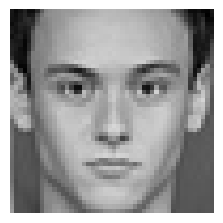

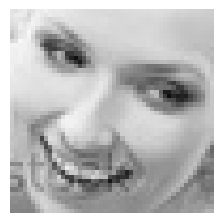

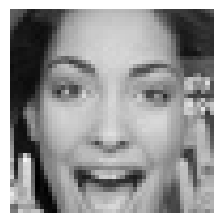

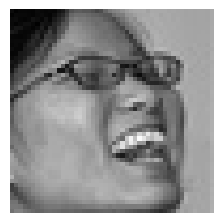

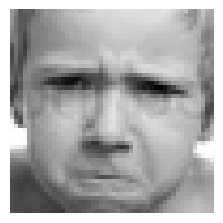

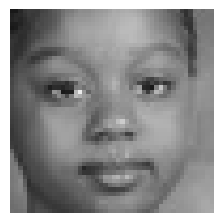

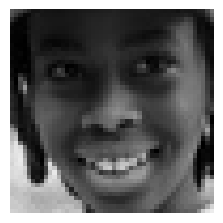

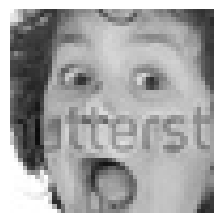

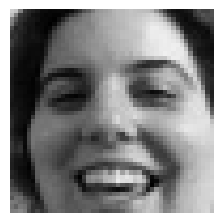

In [26]:
images = glob("Emotion_Detection/train/**/**")  # ** is used to specify the directories of the specific files
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(9,9))  # setting the size of the figure to be print ( 9 is taken because above it the images got blurred )
    plt.subplot(331+i)  #using random number so that images do not overlap
    plt.imshow(cv2.imread(image));plt.axis('off')  # plt.axis is used bacuse instead of using axes we are using images

**Preparing Data for Training**

In [34]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("Emotion_Detection/train",   #Flowfromdirectory is used as all images are present in different folders
                                                    target_size = (img_size, img_size),  
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",  #categorical is used beacuse here we have only 7 classes to predict images
                                                    shuffle = True)  # shuffles the data so we don't get the images of a certain characteristic

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("Emotion_Detection/test",   # it checks the image under the test folder
                                                    target_size = (img_size, img_size),  
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [30]:
def Convolution(input_tensor, filters, kernel_size):   # convolution is used to find the features in the image
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)   # one convolution layer has been made
    x = BatchNormalization()(x)  # normalising to remove errors
    x = Activation('relu')(x)    # turns into rectified linear unit
    x = MaxPooling2D(pool_size = (2,2))(x)  # decreasing the dimension of data
    x = Dropout(0.25)(x)   # dropout layer made to avoid overfitting

    return x

In [31]:
def Dense_f(input_tensor,nodes):      # making dense layers
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)

    return x

In [32]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))   # making a convolution layer
    conv_2 = Convolution(inputs,64,(5,5))   # a second one with different dimensions
    conv_3 = Convolution(inputs,128,(3,3))
    flatten = Flatten()(conv_3)

    dense_i = Dense_f(flatten,256)

    output = Dense(7,activation = "softmax")(dense_i)   # we have given input of 7 so that each of the seven nodes give an array

    model = Model(inputs=[inputs], outputs=[output])
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])  # compiling the model , also we used categorical 
    # crossentropy as we are comparing categories here and using accuracy metric to define the features

    return model

In [33]:
model = model_fer((48,48,1))
model.summary()    # gives the overall summary of the model formed

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0     

**Initialising the model**

In [35]:
epochs = 15    # epochs si kept small so that it does not take much time to get the result
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor = 'val_accuracy', save_weights_only = True, mode = 'max', verbose = -1)  # creating a checkpoint of each data
callbacks = [checkpoint]

# Training the Model

**The next cell takes time to complete**

In [36]:
history = model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

Epoch 1/15
448/448 [==============================] - 1240s 3s/step - loss: 1.6696 - accuracy: 0.3709 - val_loss: 1.7996 - val_accuracy: 0.3029
Epoch 2/15
448/448 [==============================] - 980s 2s/step - loss: 1.3607 - accuracy: 0.4826 - val_loss: 1.8371 - val_accuracy: 0.3133
Epoch 3/15
448/448 [==============================] - 573s 1s/step - loss: 1.1982 - accuracy: 0.5503 - val_loss: 1.5074 - val_accuracy: 0.4258
Epoch 4/15
448/448 [==============================] - 628s 1s/step - loss: 1.0740 - accuracy: 0.6019 - val_loss: 1.4614 - val_accuracy: 0.4379
Epoch 5/15
448/448 [==============================] - 594s 1s/step - loss: 0.9423 - accuracy: 0.6541 - val_loss: 1.5277 - val_accuracy: 0.4344
Epoch 6/15
448/448 [==============================] - 630s 1s/step - loss: 0.8225 - accuracy: 0.7024 - val_loss: 1.6384 - val_accuracy: 0.4621
Epoch 7/15
448/448 [==============================] - 634s 1s/step - loss: 0.7133 - accuracy: 0.7465 - val_loss: 1.6102 - val_accuracy: 0.455

**Model Evaluation**

In [37]:
model.evaluate(validation_generator)

113/113 [==============================] - 40s 358ms/step - loss: 1.9407 - accuracy: 0.5018


[1.940720558166504, 0.5018110871315002]

**Plotting Losses**

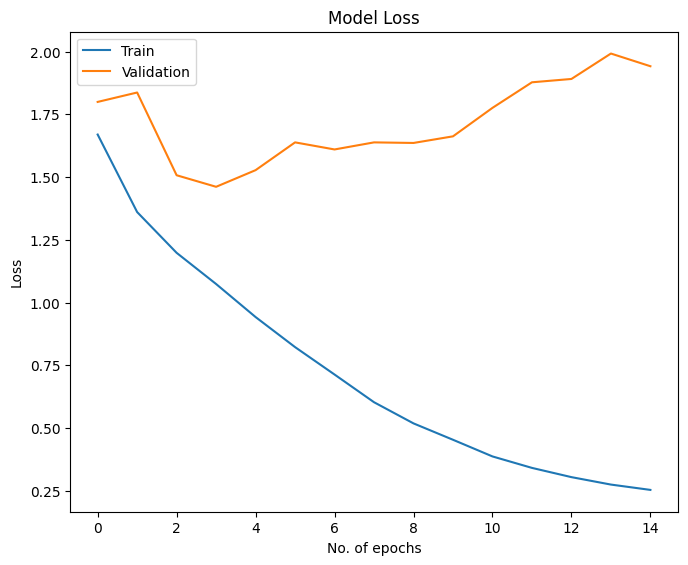

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')   # legend helps in naming the curve
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

**Plotting Accuracy**

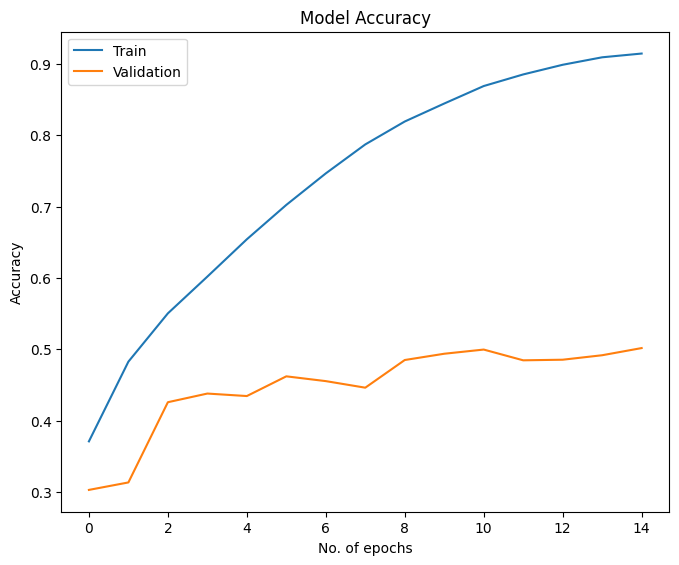

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')   # legend helps in naming the curve
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

**Saving Model**

In [ ]:
model_json = model.to_json()
with ope